In [1]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=d450221179f91c88cf60244910ccc003a4bd5a48e001d65ed6f309a145267deb
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [2]:
import pandas as pd
import numpy as np
import re                                # Regular expressions for pattern matching and text cleaning.
import spacy                              # Another NLP library, known for speed and performance.
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException        # To detect the language of a text (like English, French, etc.)
nlp = spacy.load("en_core_web_sm")

In [4]:
df = pd.read_csv(r'/content/chatgpt_reviews.csv')
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [5]:
df.shape

(50, 12)

In [6]:
def remove_whitespace(text):
    return " ".join(text.split())

df['review']=df['review'].apply(remove_whitespace)

In [7]:
# Language Detection
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

df['detect_language'] = df['review'].apply(detect_language)

# Filter only English reviews
df = df[df['detect_language'] == 'en']
print(df['detect_language'].value_counts())

detect_language
en    50
Name: count, dtype: int64


In [8]:
# Basic Text Cleaning
def clean_text(text):
    # Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)

In [9]:
# Tokenization + Lemmatization + Stopword Removal with spaCy
def spacy_preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

df['review'] = df['review'].apply(spacy_preprocess)
df['review']

,review
0,impressive natural language understanding good...
1,give wrong answer outdated info student moveme...
2,great tool generate content quickly interestin...
3,great tool generate content quickly start meth...
4,excellent language translation grammar fix pri...
5,explain complex topic clearly simply detail vi...
6,excellent language translation grammar fixes f...
7,give wrong answer outdated info catch easy inc...
8,give wrong answer outdated info trial suffer p...
9,helpful code debug task tax hard thousand envi...


In [10]:
df['review'] = df['review'].str.replace(r'\s*\n\s*', ' ', regex=True)

In [11]:
pd.set_option('display.max_colwidth', None)
print(df[['review']].head(10))  # Show full text of first 10 reviews

                                                                            review
0                         impressive natural language understanding good newspaper
1  give wrong answer outdated info student movement power condition camera contain
2         great tool generate content quickly interesting evening population claim
3                        great tool generate content quickly start method pressure
4          excellent language translation grammar fix price structure rate quality
5   explain complex topic clearly simply detail visit current pretty suddenly find
6                 excellent language translation grammar fixes fund country expert
7                 give wrong answer outdated info catch easy include sister speech
8                           give wrong answer outdated info trial suffer pull dark
9             helpful code debug task tax hard thousand environment sell operation


In [12]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase', 'detect_language'],
      dtype='object')

In [13]:
# EXPLORATORY DATA ANALYSIS (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

/tmp/ipython-input-3985966935.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='coolwarm')


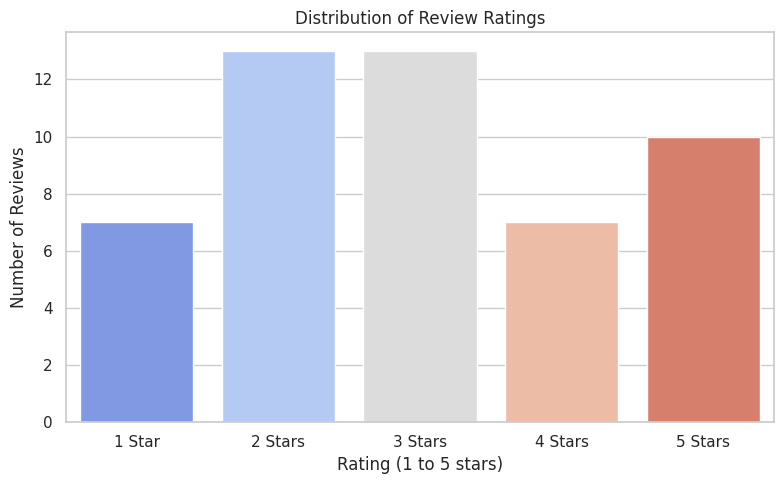

In [14]:
# 1. What is the distribution of review ratings?
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the distribution of review ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', palette='coolwarm')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating (1 to 5 stars)')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1, 2, 3, 4], ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'])
plt.tight_layout()
plt.show()

 3-star and 2-star reviews are the most common — each has the highest number of reviews (13).
 5-star reviews are moderate (10 reviews), indicating a fair number of highly satisfied users.
 1-star and 4-star reviews are the least frequent (7 reviews each).

 Interpretation:
 The concentration around 2 and 3 stars suggests that users are neutral to slightly dissatisfied overall.
 A relatively low number of 1-star reviews implies few extremely negative experiences.
 5-star reviews indicate some strong positive sentiment, but they don’t dominate.

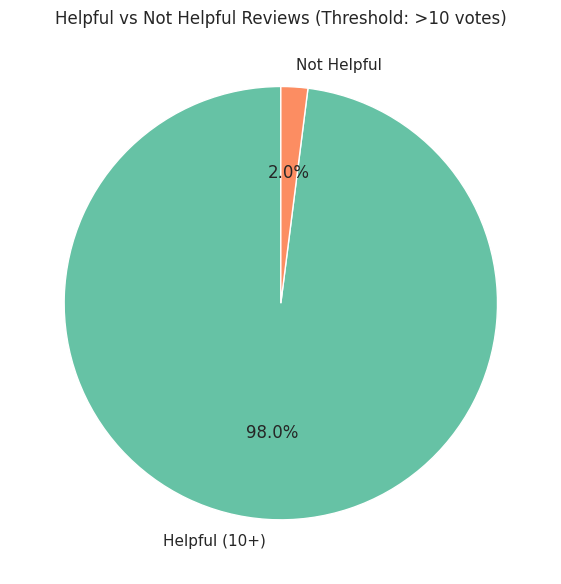

In [15]:
# 2. How many reviews were marked as helpful (above a certain threshold)?

# Define threshold
threshold = 10

# Count helpful vs not helpful
helpful_counts = pd.Series([
    'Helpful (10+)' if x > threshold else 'Not Helpful'
    for x in df['helpful_votes']
]).value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62']
helpful_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Helpful vs Not Helpful Reviews (Threshold: >10 votes)')
plt.ylabel('')
plt.tight_layout()
plt.show()

 98% of reviews are considered Helpful (received more than 10 helpful votes). Only 2% are Not Helpful (≤10 helpful votes).

 Interpretation:
 This extremely high percentage of helpful reviews suggests that users find significant value in the content of the reviews.
It indicates that most reviews are well-written, relevant, or informative, leading others to upvote them.

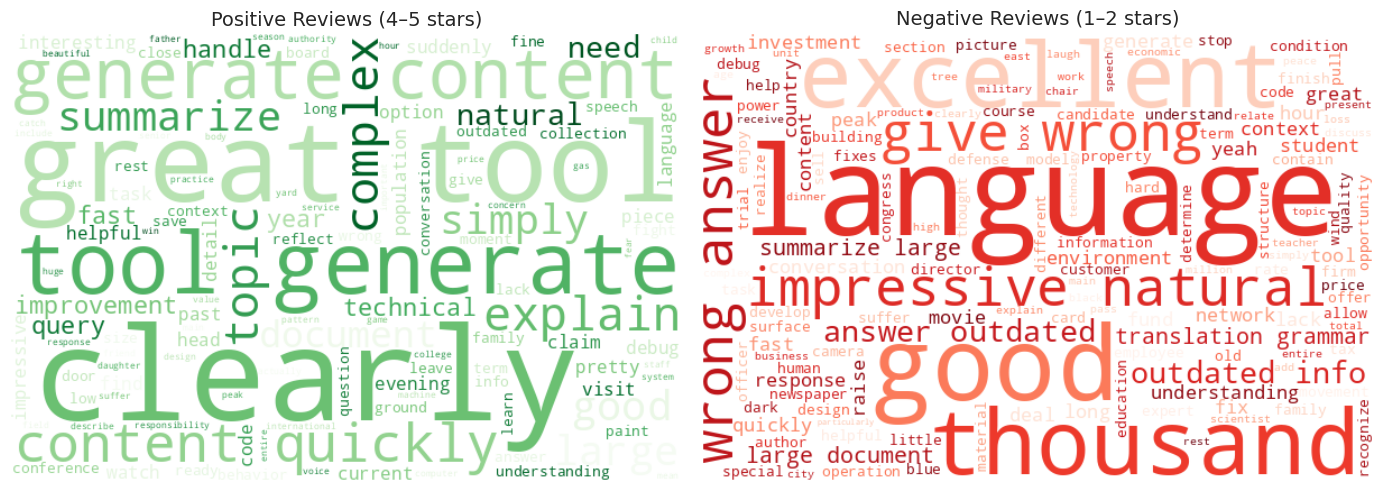

In [16]:
# 3. Most Common Keywords in Positive vs. Negative Reviews

# Filter based on ratings
positive_reviews = df[df['rating'] >= 4]['review']
negative_reviews = df[df['rating'] <= 2]['review']

# Join all text
positive_text = ' '.join(positive_reviews.dropna().astype(str))
negative_text = ' '.join(negative_reviews.dropna().astype(str))

# Create word clouds
plt.figure(figsize=(14, 6))

# Positive word cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews (4–5 stars)", fontsize=14)

# Negative word cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews (1–2 stars)", fontsize=14)

plt.tight_layout()
plt.show()

Positive Reviews (4–5 Stars)
Top keywords:
clearly, great, tool, generating, content, natural, topics, explains, complex, improvement

Interpretation:
Users praise the tool's clarity, quality, and content generation capabilities.
Words like "natural", "explains", and "complex topics" suggest that users find it intelligent,
helpful for learning, and effective at communicating complex ideas.
The term "great tool" reflects strong overall satisfaction.

Negative Reviews (1–2 Stars)
Top keywords:
understanding, good, excellent, translation, wrong answers, outdated info, sometimes, lacks, thousand, language

Interpretation:
Even in negative reviews, words like "good" or "excellent" may indicate mixed Sentiment may still be labeled negative if the overall tone is dissatisfied.
Complaints center around incorrect responses, translation issues, and outdated information.
Frequent mention of "sometimes", "lacks", and "wrong" implies inconsistency and accuracy issues.
Keywords like "thousand" or "language" may reflect issues with bulk data or multilingual support.

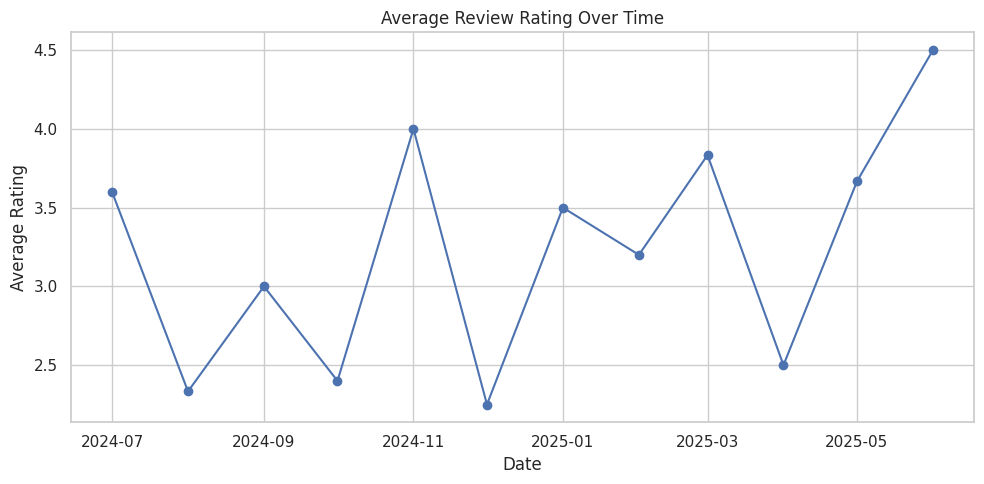

In [17]:
# 4. How has the average rating changed over time?

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by time — weekly or monthly
avg_rating_over_time = df.groupby(df['date'].dt.to_period('M'))['rating'].mean().reset_index()
avg_rating_over_time['date'] = avg_rating_over_time['date'].dt.to_timestamp()

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(avg_rating_over_time['date'], avg_rating_over_time['rating'], marker='o', linestyle='-')
plt.title('Average Review Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

Y-axis (Average Rating): Reflects the satisfaction level (presumably from 1 to 5).
X-axis (Date): Monthly time stamps ranging from mid-2024 to mid-2025.

Overall Trend:
There is noticeable fluctuation in the ratings.
Lowest point: Around December 2024 (~2.2 rating).
Highest point: June 2025 (~4.5 rating).
Recent months show an upward trend, indicating improving user satisfaction.

/tmp/ipython-input-2907904043.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette="coolwarm")


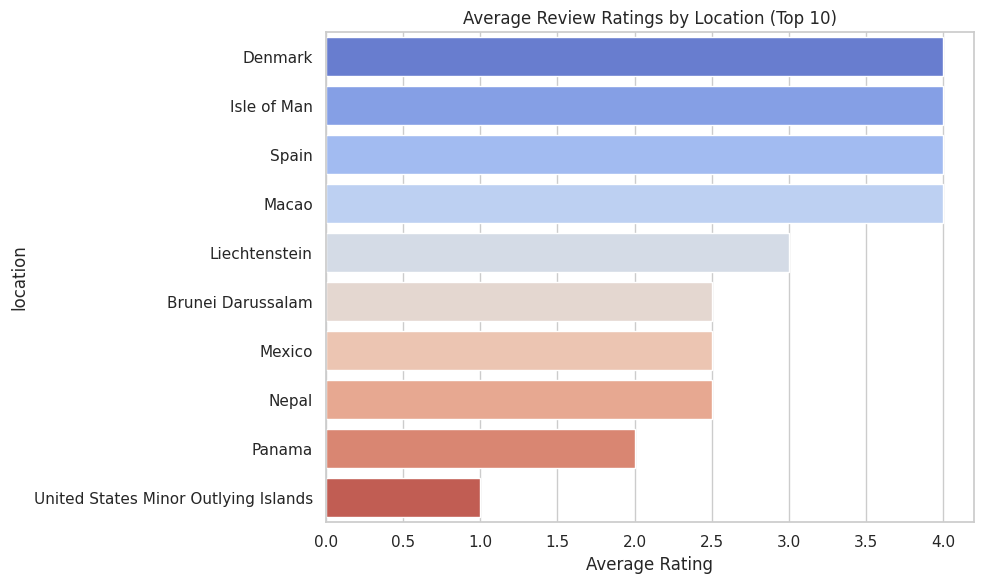

In [18]:
# 5. How Do Ratings Vary by User Location?

# Top 10 countries by review count
top_countries = df['location'].value_counts().nlargest(10).index
filtered_df = df[df['location'].isin(top_countries)]

# Average rating by location
avg_rating_by_location = filtered_df.groupby('location')['rating'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette="coolwarm")
plt.xlabel('Average Rating')
plt.title('Average Review Ratings by Location (Top 10)')
plt.tight_layout()
plt.show()

X-axis: Shows the average review rating (presumably on a scale of 1 to 5).
Y-axis: Lists the top 10 locations based on rating values (descending order).
High Satisfaction Regions:
European regions like Denmark, Isle of Man, and Spain lead in satisfaction.
Macao and Liechtenstein also perform relatively well.
Low Satisfaction Regions:
Countries like Panama and U.S. Minor Outlying Islands show significantly lower average ratings, with scores closer to 1.0–2.0.

Potential Factors:
These differences might reflect:
Regional customer expectations
Localization quality
Accessibility or feature availability
Support responsiveness
Cultural perceptions of satisfaction

/tmp/ipython-input-235527694.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='rating', data=avg_rating_by_platform, palette='Set2')


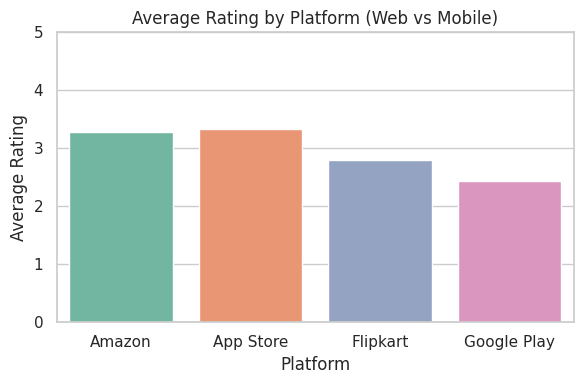

In [19]:
# 6. Which Platform Gets Better Reviews? (Web vs. Mobile)

# Group by platform and calculate average ratings
avg_rating_by_platform = df.groupby('platform')['rating'].mean().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='platform', y='rating', data=avg_rating_by_platform, palette='Set2')
plt.title('Average Rating by Platform (Web vs Mobile)')
plt.ylabel('Average Rating')
plt.xlabel('Platform')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

High-Performing Platforms
Amazon & App Store show relatively higher satisfaction.
Indicates strong UX, good performance, or effective customer support.
Could be used as benchmarks for what’s working well.

Low-Performing Platforms
Flipkart & Google Play receive lower average ratings.
UI/UX issues specific to these apps
Feature inconsistency or bugs
Poorer update cycles or customer support
Actionable Insight: These platforms deserve focused product improvement efforts.

Helps Product Teams Focus Improvements:
Identify what's different in high-rated apps (App Store vs Google Play) and adapt.
UX/UI Optimization
Prioritize Bug Fixes and Feature Enhancements

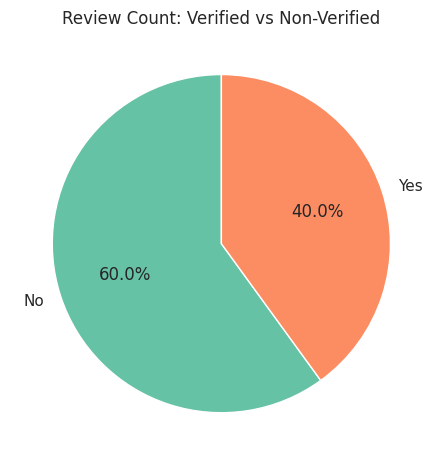

In [20]:
# 7. Are Verified Users More Satisfied Than Non-Verified Ones?

# Distribution of Verified vs Non-Verified Reviews
verified_counts = df['verified_purchase'].value_counts()

# Plotting side-by-side pie charts
plt.figure(figsize=(12, 6))
colors = ['#66c2a5', '#fc8d62']

# Subplot 1: Review count
plt.subplot(1, 2, 1)
verified_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=verified_counts.index,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Review Count: Verified vs Non-Verified')
plt.ylabel('');

1. Verified Users Are More Honest / Critical
Verified users might give more honest and critical feedback.
They’ve paid or used the product seriously, so they hold it to a higher standard.

2. Fake Positive Reviews from Non-Verified Users
Non-verified reviews might be less authentic or even promotional.
It's not uncommon to see higher ratings from non-verified users in such cases.

3. Expectation Gap
Verified users might have higher expectations and are disappointed if the product underdelivers.
Non-verified users may have just tried the product briefly or judged it lightly.

/tmp/ipython-input-3748945557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='review_length', data=df, palette='Blues')


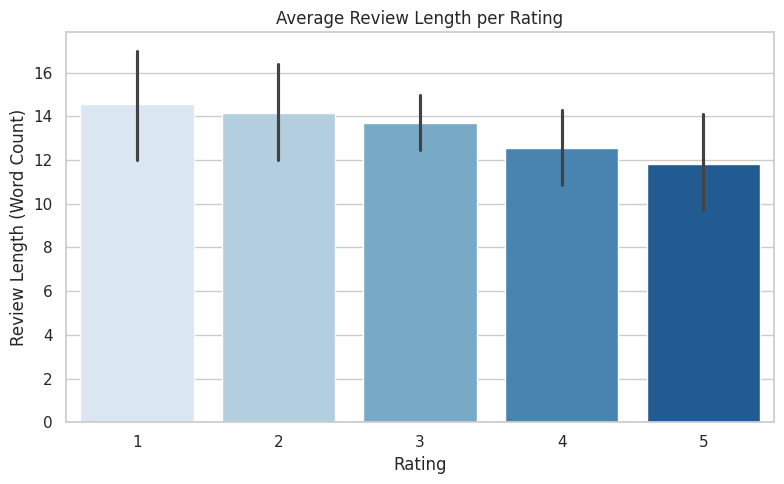

In [21]:
# 8. Average Length of Reviews per Rating Category

# Bar Chart: Average Review Length by Rating
plt.figure(figsize=(8, 5))
sns.barplot(x='rating', y='review_length', data=df, palette='Blues')
plt.title('Average Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (Word Count)')
plt.tight_layout()
plt.show()

people write longer reviews when they're unhappy and shorter reviews when they are very happy.

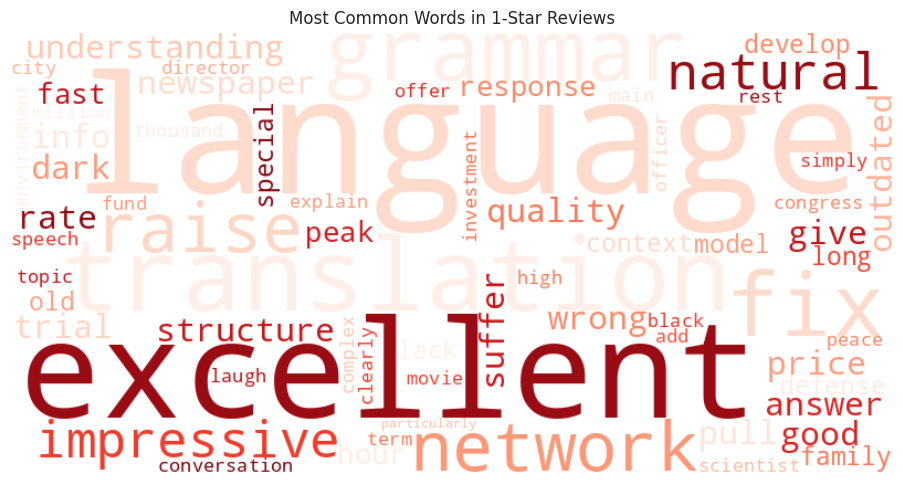

In [22]:
# 9. Most Mentioned Words in 1-Star Reviews

# Filter 1-star reviews
one_star_text = ' '.join(df[df['rating'] == 1]['review'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(one_star_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in 1-Star Reviews')
plt.tight_layout()
plt.show()

Spot recurring issues or complaints.

/tmp/ipython-input-598308749.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='rating', data=version_avg, palette='viridis')


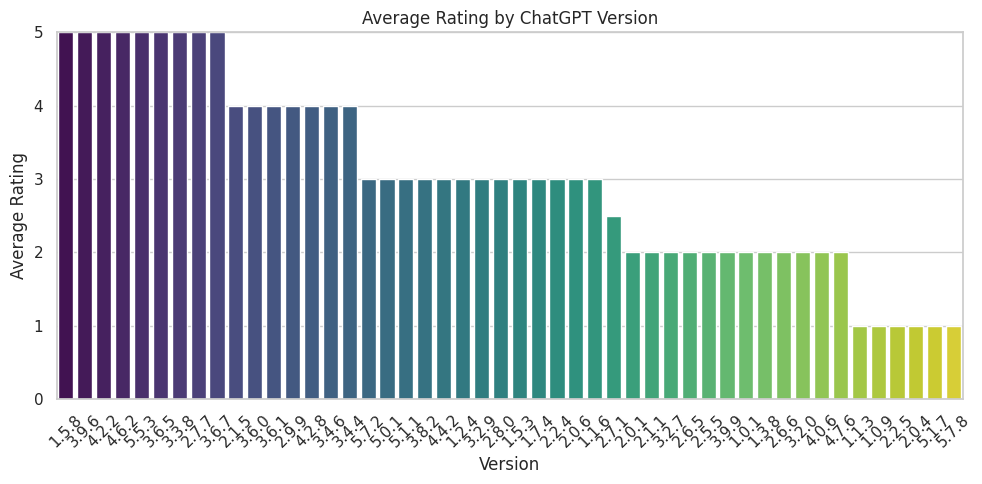

In [23]:
# 10. Which ChatGPT Version Received the Highest Average Rating?

# Group by version and calculate average rating
version_avg = df.groupby('version')['rating'].mean().sort_values(ascending=False).reset_index()

# Bar plot: Versions vs average ratings
plt.figure(figsize=(10, 5))
sns.barplot(x='version', y='rating', data=version_avg, palette='viridis')
plt.title('Average Rating by ChatGPT Version')
plt.xlabel('Version')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

Evaluate improvement or regression across updates.

In [24]:
# Sentiment Labeling

def label_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['rating'].apply(label_sentiment)
print(df[['rating', 'sentiment']].head(10))

# Ratings 1 or 2 → 'negative'
# Rating 3 → 'neutral'
# Ratings 4 or 5 (or anything above 3) → 'positive'

   rating sentiment
0       1  negative
1       2  negative
2       5  positive
3       3   neutral
4       1  negative
5       4  positive
6       2  negative
7       3   neutral
8       1  negative
9       2  negative


In [25]:
df_sen=df

In [26]:
df_sen.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase', 'detect_language', 'sentiment'],
      dtype='object')

In [27]:
df_sen.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,detect_language,sentiment
0,2024-12-24,East list local interesting far magazine father.,impressive natural language understanding good newspaper,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,en,negative
1,2024-07-26,Road determine picture figure hard experience red.,give wrong answer outdated info student movement power condition camera contain,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,en,negative
2,2024-08-22,Policy social past analysis whole.,great tool generate content quickly interesting evening population claim,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,en,positive
3,2025-04-24,News financial billion four foreign.,great tool generate content quickly start method pressure,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,en,neutral
4,2024-08-15,To skill she case sing stop likely.,excellent language translation grammar fix price structure rate quality,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,en,negative


/tmp/ipython-input-3018718615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sen, x='sentiment', palette='pastel')


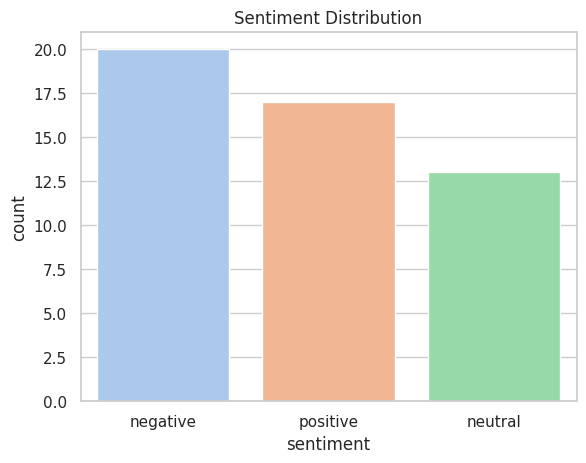

In [28]:
# Count of Each Sentiment
sns.countplot(data=df_sen, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution')
plt.show()

What is a WordCloud?
A WordCloud is a visual representation of text data where the size of each word reflects its frequency
or importance in the text. The more often a word appears, the bigger and bolder it looks in the cloud.
It’s a popular way to get an immediate sense of the most common words in a collection of documents.

/tmp/ipython-input-2208634370.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq.sort_values(by='frequency', ascending=False), x='frequency', y='word', palette='Blues_r')


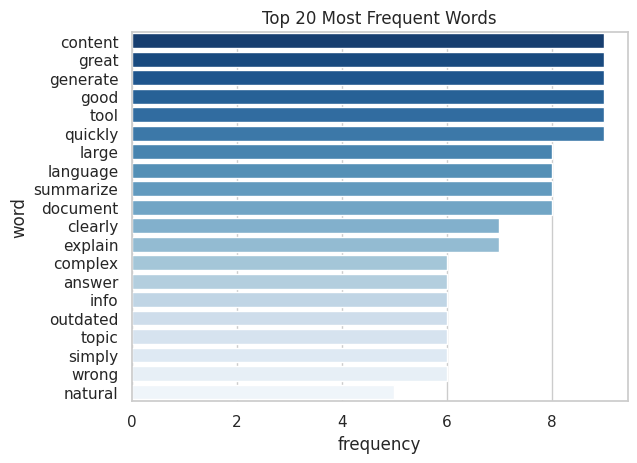

In [29]:
# Most Frequent Words (Histogram)
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df_sen['review'])

# Convert to DataFrame
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': X.toarray().sum(axis=0)
})

# Plot
sns.barplot(data=word_freq.sort_values(by='frequency', ascending=False), x='frequency', y='word', palette='Blues_r')
plt.title('Top 20 Most Frequent Words')
plt.show()

In [30]:
df_sen['sentiment_num'] = df_sen['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

In [31]:
df_sen.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,detect_language,sentiment,sentiment_num
0,2024-12-24,East list local interesting far magazine father.,impressive natural language understanding good newspaper,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,en,negative,0
1,2024-07-26,Road determine picture figure hard experience red.,give wrong answer outdated info student movement power condition camera contain,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,en,negative,0
2,2024-08-22,Policy social past analysis whole.,great tool generate content quickly interesting evening population claim,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,en,positive,2
3,2025-04-24,News financial billion four foreign.,great tool generate content quickly start method pressure,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,en,neutral,1
4,2024-08-15,To skill she case sing stop likely.,excellent language translation grammar fix price structure rate quality,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,en,negative,0


In [32]:
df_sen.shape

(50, 15)

In [33]:
df_sen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               50 non-null     datetime64[ns]
 1   title              50 non-null     object        
 2   review             50 non-null     object        
 3   rating             50 non-null     int64         
 4   username           50 non-null     object        
 5   helpful_votes      50 non-null     int64         
 6   review_length      50 non-null     int64         
 7   platform           50 non-null     object        
 8   language           50 non-null     object        
 9   location           50 non-null     object        
 10  version            50 non-null     object        
 11  verified_purchase  50 non-null     object        
 12  detect_language    50 non-null     object        
 13  sentiment          50 non-null     object        
 14  sentiment_nu

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Features and target
X_text = df_sen['review']
y = df_sen['sentiment']

In [35]:
X_text

,review
0,impressive natural language understanding good newspaper
1,give wrong answer outdated info student movement power condition camera contain
2,great tool generate content quickly interesting evening population claim
3,great tool generate content quickly start method pressure
4,excellent language translation grammar fix price structure rate quality
5,explain complex topic clearly simply detail visit current pretty suddenly find
6,excellent language translation grammar fixes fund country expert
7,give wrong answer outdated info catch easy include sister speech
8,give wrong answer outdated info trial suffer pull dark
9,helpful code debug task tax hard thousand environment sell operation


In [36]:
y

,sentiment
0,negative
1,negative
2,positive
3,neutral
4,negative
5,positive
6,negative
7,neutral
8,negative
9,negative


In [37]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(X_text)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf.toarray(), y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=43, stratify=y_resampled
)


🔹 Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

    negative       0.44      1.00      0.62         4
     neutral       1.00      0.25      0.40         4
    positive       0.50      0.25      0.33         4

    accuracy                           0.50        12
   macro avg       0.65      0.50      0.45        12
weighted avg       0.65      0.50      0.45        12

Accuracy: 0.5
AUC-ROC Score (OvR): 0.7395833333333334


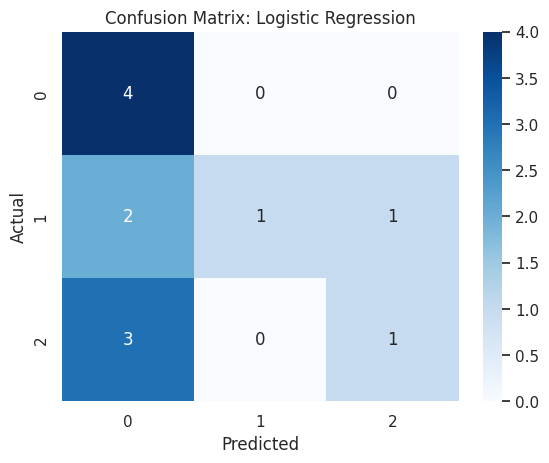

Cross-validation Accuracy Scores: [0.83333333 0.41666667 0.33333333 0.66666667 0.75      ]
Mean CV Accuracy: 0.6

🔹 Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

    negative       0.33      0.75      0.46         4
     neutral       0.00      0.00      0.00         4
    positive       0.00      0.00      0.00         4

    accuracy                           0.25        12
   macro avg       0.11      0.25      0.15        12
weighted avg       0.11      0.25      0.15        12

Accuracy: 0.25
AUC-ROC Score (OvR): 0.6041666666666666


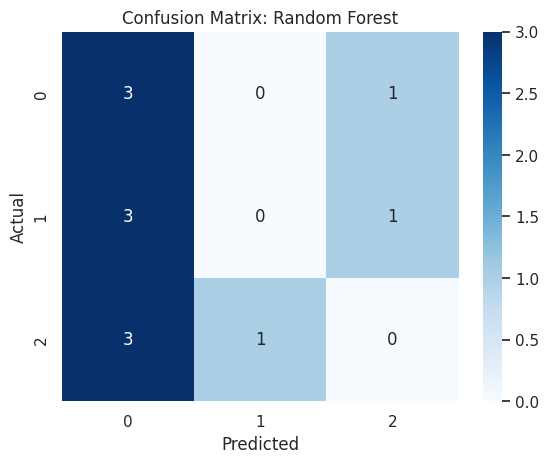

Cross-validation Accuracy Scores: [0.5        0.33333333 0.33333333 0.5        0.75      ]
Mean CV Accuracy: 0.4833333333333333

🔹 Model: Naive Bayes
Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.50      0.57         4
     neutral       0.40      0.50      0.44         4
    positive       0.25      0.25      0.25         4

    accuracy                           0.42        12
   macro avg       0.44      0.42      0.42        12
weighted avg       0.44      0.42      0.42        12

Accuracy: 0.4166666666666667
AUC-ROC Score (OvR): 0.75


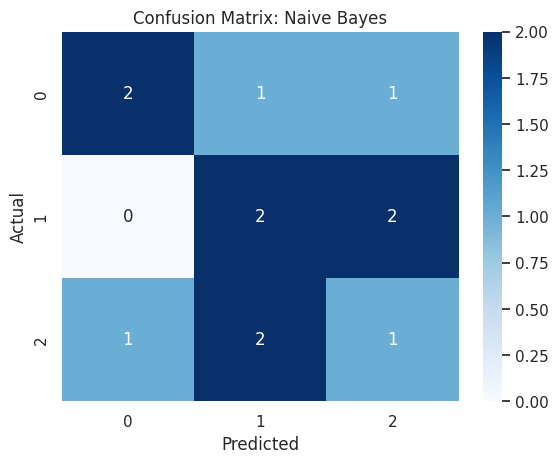

Cross-validation Accuracy Scores: [0.75       0.33333333 0.25       0.58333333 0.75      ]
Mean CV Accuracy: 0.5333333333333333


In [38]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB()
}

# Loop through models
for name, model in models.items():
    print(f"\n🔹 Model: {name}")

    # Fit
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # AUC-ROC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        print("AUC-ROC Score (OvR):", auc)
    else:
        print("AUC-ROC not available (model does not support probability prediction)")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Cross-validation Accuracy
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    print("Cross-validation Accuracy Scores:", scores)
    print("Mean CV Accuracy:", scores.mean())

In [39]:
# from sklearn.neural_network import MLPClassifier

# # Initialize MLP model
# mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64),  # two hidden layers
#                           activation='relu',
#                           solver='adam',
#                           max_iter=300,
#                           early_stopping=True,
#                           n_iter_no_change=10,
#                           validation_fraction=0.1,
#                           random_state=42)

# print("\n🔹 Model: MLPClassifier")

# # Fit the model
# mlp_model.fit(X_train, y_train)

# # Predict on test set
# y_pred_mlp = mlp_model.predict(X_test)

# # Classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred_mlp))

# # Accuracy
# print("Accuracy:", accuracy_score(y_test, y_pred_mlp))

# # AUC-ROC Score
# if hasattr(mlp_model, "predict_proba"):
#     y_proba_mlp = mlp_model.predict_proba(X_test)
#     auc_mlp = roc_auc_score(y_test, y_proba_mlp, multi_class='ovr')
#     print("AUC-ROC Score (OvR):", auc_mlp)
# else:
#     print("AUC-ROC not available (model does not support probability prediction)")

# # Confusion Matrix
# cm_mlp = confusion_matrix(y_test, y_pred_mlp)
# sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens')
# plt.title("Confusion Matrix: MLP Classifier")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# # Cross-validation (optional)
# from sklearn.model_selection import cross_val_score
# cv_scores_mlp = cross_val_score(mlp_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
# print("Cross-validation Accuracy Scores:", cv_scores_mlp)
# print("Mean CV Accuracy:", cv_scores_mlp.mean())

In [40]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{'negative': np.int64(16), 'neutral': np.int64(16), 'positive': np.int64(16)}


# Logistic Regression

Best mean cross-validation score → generalizes better
AUC-ROC is competitive (and quite strong)
Simple, interpretable, and robust for small datasets

In [41]:
import pickle

# Assuming `model` is your trained LogisticRegression instance
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("✅ Logistic Regression model saved!")

✅ Logistic Regression model saved!


In [42]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)  # `tfidf` is your trained TfidfVectorizer
print("✅ TF-IDF vectorizer saved!")

✅ TF-IDF vectorizer saved!


In [43]:
df_sen.to_csv("reviews_dataset.csv", index=False)

In [44]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.3 MB/s eta 0:00:00


In [45]:
import pandas as pd
import streamlit as st
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer  # ✅ Add this line


# Load model and vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)
with open('logistic_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [46]:
!pip install streamlit pyngrok

In [47]:
%%writefile app.py
import pandas as pd
import streamlit as st
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer  # Used later for keywords (ok to keep)


# Load model and vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)
with open('logistic_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load preprocessed dataset with true sentiments
df = pd.read_csv(r'/content/reviews_dataset.csv')

st.title("Sentiment Analysis with Comparison")

user_input = st.text_area("Enter your review here:")

if st.button("Predict Sentiment"):
    if user_input.strip() == "":
        st.warning("Please enter some text for prediction.")
    else:
        # Predict sentiment
        input_tfidf = tfidf.transform([user_input])
        prediction = model.predict(input_tfidf)[0]

        # ❌ POTENTIAL ISSUE: Check number of classes in your model
        # If model.classes_ is [0, 1] -> remove "neutral" from mapping
        # If model.classes_ is [0, 1, 2], ensure training labels were correct
        sentiment_map = {0: "negative", 1: "neutral", 2: "positive"}
        pred_sentiment = sentiment_map.get(prediction, str(prediction))

        # Display the prediction
        st.write(f"**Predicted Sentiment:** {pred_sentiment}")

st.markdown("---")
st.header("Sentiment Analysis Insights")

# 1. Overall sentiment proportions
with st.expander("1. What is the overall sentiment of user reviews?"):
    # OK - but ensure sentiment is categorical (string)
    sentiment_counts = df['sentiment'].value_counts(normalize=True).round(2) * 100
    st.bar_chart(sentiment_counts)

# 2. Sentiment by rating
with st.expander("2. How does sentiment vary by rating?"):
    if 'rating' in df.columns:
        # ❌ normalize=True with st.bar_chart may misalign values
        # Use raw counts instead for bar_chart compatibility
        chart_data = df.groupby('rating')['sentiment'].value_counts().unstack().fillna(0)
        st.bar_chart(chart_data)
    else:
        st.info("Rating column not found.")

# 3. Keywords/phrases by sentiment
with st.expander("3. Which keywords are most associated with each sentiment class?"):
    for sentiment in ['positive', 'neutral', 'negative']:
        st.write(f"**{sentiment.capitalize()} reviews word cloud**")
        text = ' '.join(df[df['sentiment'] == sentiment]['review'].astype(str))
        wc = WordCloud(width=600, height=400, background_color='white').generate(text)
        st.image(wc.to_array())

# 4. Sentiment over time
with st.expander("4. How has sentiment changed over time?"):
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df_time = df.dropna(subset=['date'])
        sentiment_trend = df_time.groupby(df_time['date'].dt.to_period('M'))['sentiment'].value_counts().unstack().fillna(0)
        sentiment_trend.index = sentiment_trend.index.to_timestamp()
        st.line_chart(sentiment_trend)
    else:
        st.info("Date column not found.")

# 5. Sentiment vs. verified users
with st.expander("5. Do verified users tend to leave more positive or negative reviews?"):
    if 'verified_purchase' in df.columns:
        chart_data = df.groupby('verified_purchase')['sentiment'].value_counts().unstack().fillna(0)
        st.bar_chart(chart_data)
    else:
        st.info("Verified purchase column not found.")

# 6. Sentiment vs. review length
with st.expander("6. Are longer reviews more likely to be negative or positive?"):
    df['review_length'] = df['review'].astype(str).apply(len)
    fig, ax = plt.subplots()
    # ❌ Ensure sentiment is string to avoid misinterpretation
    df['sentiment'] = df['sentiment'].astype(str)
    sns.boxplot(data=df, x='sentiment', y='review_length', ax=ax)
    st.pyplot(fig)

# 7. Sentiment by location
with st.expander("7. Which locations show the most positive or negative sentiment?"):
    if 'location' in df.columns:
        chart_data = df.groupby('location')['sentiment'].value_counts().unstack().fillna(0)
        st.bar_chart(chart_data)
    else:
        st.info("Location column not found.")

# 8. Sentiment across platforms
with st.expander("8. Is there a difference in sentiment across platforms?"):
    if 'platform' in df.columns:
        chart_data = df.groupby('platform')['sentiment'].value_counts().unstack().fillna(0)
        st.bar_chart(chart_data)
    else:
        st.info("Platform column not found.")

# 9. Sentiment by ChatGPT version
with st.expander("9. Which ChatGPT versions are associated with higher/lower sentiment?"):
    if 'version' in df.columns:
        chart_data = df.groupby('version')['sentiment'].value_counts().unstack().fillna(0)
        st.bar_chart(chart_data)
    else:
        st.info("ChatGPT version column not found.")

# 10. Common themes in negative reviews
with st.expander("10. What are the most common negative feedback themes?"):
    negative_reviews = df[df['sentiment'] == 'negative']['review'].astype(str)
    # OK to use CountVectorizer for top keywords extraction
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    X = vectorizer.fit_transform(negative_reviews)
    keywords = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
    st.bar_chart(keywords)

Writing app.py


In [48]:
!ngrok config add-authtoken 326gWKCpZ36LpURSD7hP3GFsiQ2_2qkosBpysugZfC3jvawoZ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [49]:
from pyngrok import ngrok
!streamlit run app.py &>/dev/null &
public_url = ngrok.connect(8501)
print("Click this URL to access the app:", public_url)


Click this URL to access the app: NgrokTunnel: "https://bb0ac598a6d2.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
%%writefile app.py
import pandas as pd
import streamlit as st
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer  # ✅ Add this line


# Load model and vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)
with open('logistic_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load preprocessed dataset with true sentiments
df = pd.read_csv(r'/content/reviews_dataset.csv')

st.title("Sentiment Analysis with Comparison")

user_input = st.text_area("Enter your review here:")

if st.button("Predict Sentiment"):
    if user_input.strip() == "":
        st.warning("Please enter some text for prediction.")
    else:
        # Predict sentiment
        input_tfidf = tfidf.transform([user_input])
        prediction = model.predict(input_tfidf)[0]
        sentiment_map = {0: "negative", 1: "neutral", 2: "positive"}
        pred_sentiment = sentiment_map.get(prediction, str(prediction))

        # Display the prediction
        st.write(f"**Predicted Sentiment:** {pred_sentiment}")

st.markdown("---")
st.header("Sentiment Analysis Insights")

# 1. Overall sentiment proportions
with st.expander("1. What is the overall sentiment of user reviews?"):
    sentiment_counts = df['sentiment'].value_counts(normalize=True).round(2) * 100
    st.bar_chart(sentiment_counts)

# 2. Sentiment by rating
with st.expander("2. How does sentiment vary by rating?"):
    if 'rating' in df.columns:
        st.bar_chart(df.groupby('rating')['sentiment'].value_counts(normalize=True).unstack().fillna(0))
    else:
        st.info("Rating column not found.")

# 3. Keywords/phrases by sentiment
with st.expander("3. Which keywords are most associated with each sentiment class?"):
    for sentiment in ['positive', 'neutral', 'negative']:
        st.write(f"**{sentiment.capitalize()} reviews word cloud**")
        text = ' '.join(df[df['sentiment'] == sentiment]['review'].astype(str))
        wc = WordCloud(width=600, height=400, background_color='white').generate(text)
        st.image(wc.to_array())

# 4. Sentiment over time
with st.expander("4. How has sentiment changed over time?"):
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df_time = df.dropna(subset=['date'])
        sentiment_trend = df_time.groupby(df_time['date'].dt.to_period('M'))['sentiment'].value_counts().unstack().fillna(0)
        sentiment_trend.index = sentiment_trend.index.to_timestamp()
        st.line_chart(sentiment_trend)
    else:
        st.info("Date column not found.")

# 5. Sentiment vs. verified users
with st.expander("5. Do verified users tend to leave more positive or negative reviews?"):
    if 'verified_purchase' in df.columns:
        st.bar_chart(df.groupby('verified_purchase')['sentiment'].value_counts(normalize=True).unstack().fillna(0))
    else:
        st.info("Verified purchase column not found.")

# 6. Sentiment vs. review length
with st.expander("6. Are longer reviews more likely to be negative or positive?"):
    df['review_length'] = df['review'].astype(str).apply(len)
    fig, ax = plt.subplots()
    sns.boxplot(data=df, x='sentiment', y='review_length', ax=ax)
    st.pyplot(fig)

# 7. Sentiment by location
with st.expander("7. Which locations show the most positive or negative sentiment?"):
    if 'location' in df.columns:
        st.bar_chart(df.groupby('location')['sentiment'].value_counts(normalize=True).unstack().fillna(0))
    else:
        st.info("Location column not found.")

# 8. Sentiment across platforms
with st.expander("8. Is there a difference in sentiment across platforms?"):
    if 'platform' in df.columns:
        st.bar_chart(df.groupby('platform')['sentiment'].value_counts(normalize=True).unstack().fillna(0))
    else:
        st.info("Platform column not found.")

# 9. Sentiment by ChatGPT version
with st.expander("9. Which ChatGPT versions are associated with higher/lower sentiment?"):
    if 'version' in df.columns:
        st.bar_chart(df.groupby('version')['sentiment'].value_counts(normalize=True).unstack().fillna(0))
    else:
        st.info("ChatGPT version column not found.")

# 10. Common themes in negative reviews
with st.expander("10. What are the most common negative feedback themes?"):
    negative_reviews = df[df['sentiment'] == 'negative']['review'].astype(str)
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    X = vectorizer.fit_transform(negative_reviews)
    keywords = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
    st.bar_chart(keywords)